<a href="https://colab.research.google.com/github/DhruvBarthwal/LangGraph/blob/main/LangGraph4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sequential Graph**

In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [8]:
class AgentState(TypedDict):
  name : str
  age : str
  skills : str
  final : str

In [9]:
def first_node(state : AgentState) -> AgentState:
  """This is the first node of the sequential graph"""

  state['final'] = f"{state['name']}, welcome to the system! "
  return state

def second_node(state : AgentState) ->AgentState:
  """This is the second node of the sequential graph"""

  state['final'] = state['final'] + f"You are {state['age']} years old!"
  return state

def third_node(state : AgentState) -> AgentState:
  """This is the third node of the sequential graph"""

  state['final'] = state['final'] + f"You have skills in : {state['skills']}"
  return state

In [10]:
graph = StateGraph(AgentState)
graph.add_node("first",first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)

graph.add_edge("first","second")
graph.add_edge("second","third")

graph.set_entry_point("first")
graph.set_finish_point("third")

app = graph.compile()

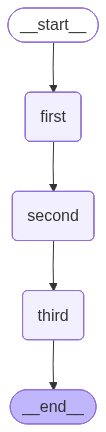

In [11]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
answer = app.invoke({"name": "Dhruv", "age" : "20","skills" : "Python , Machine Learning and LangGraph"})

In [14]:
print(answer["final"])

Dhruv, welcome to the system! You are 20 years old!You have skills in : Python , Machine Learning and LangGraph
